<a href="https://colab.research.google.com/github/augsornthip03/SoundRecognitionOilpalm/blob/main/oilpalm_Sound_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Oil Palm Knocking Sound Classification** (3-classes)

In [1]:
import os
import librosa
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:

# JSON file in Google Drive
json_file_path = "/content/drive/MyDrive/3 classes/fuck.json"

# Open and read the JSON file
with open(json_file_path, 'r') as json_file:
    data = json.load(json_file)
x = np.array(data["mfcc"])
y = np.array(data["label"])

In [3]:
# check the shape of input data to reshape it to a,b,1
print(x.shape)

(2075, 24, 13)


In [4]:
# add 1 as the last dimention to tell the model that is greyscale
x = x.reshape(2075,24,13,1)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
# build model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation ='relu', input_shape=(24,13,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3,activation=tf.nn.softmax)
])
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=adam,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/100
52/52 [==============================] - 6s 58ms/step - loss: 5.3209 - accuracy: 0.3958 - val_loss: 1.4194 - val_accuracy: 0.4699
Epoch 2/100
52/52 [==============================] - 2s 38ms/step - loss: 1.8409 - accuracy: 0.4831 - val_loss: 0.9814 - val_accuracy: 0.5904
Epoch 3/100
52/52 [==============================] - 2s 30ms/step - loss: 1.1911 - accuracy: 0.5530 - val_loss: 0.8910 - val_accuracy: 0.6169
Epoch 4/100
52/52 [==============================] - 2s 30ms/step - loss: 1.0210 - accuracy: 0.5602 - val_loss: 0.8586 - val_accuracy: 0.6265
Epoch 5/100
52/52 [==============================] - 1s 28ms/step - loss: 0.9080 - accuracy: 0.6030 - val_loss: 0.8315 - val_accuracy: 0.6096
Epoch 6/100
52/52 [==============================] - 2s 30ms/step - loss: 0.8645 - accuracy: 0.5861 - val_loss: 0.7906 - val_accuracy: 0.6265
Epoch 7/100
52/52 [==============================] - 2s 30ms/step - loss: 0.8091 - accuracy: 0.6331 - val_loss: 0.7618 - val_accuracy: 0.6506
Epoch 

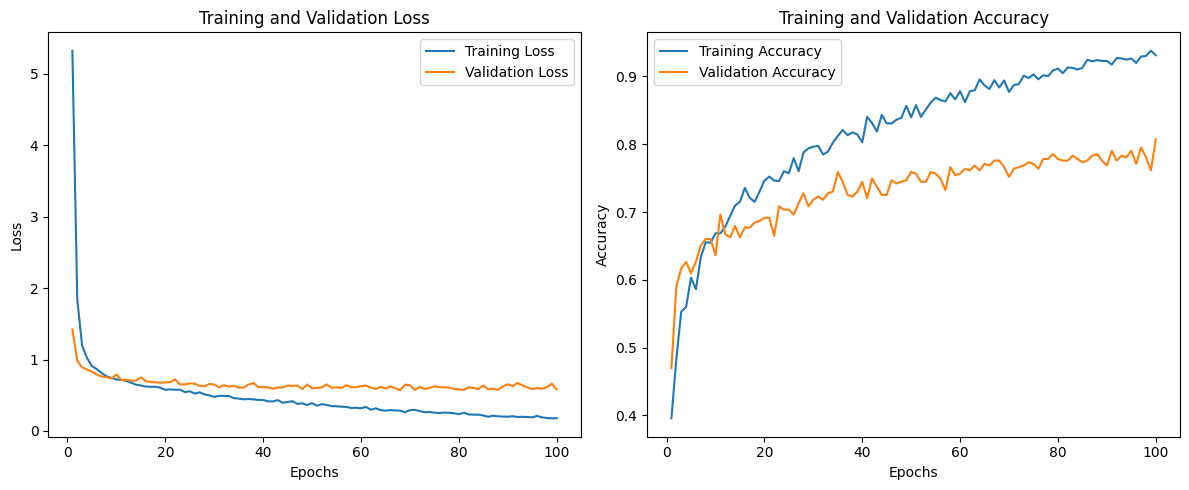

In [7]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

# Access training history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create an array of epoch numbers for x-axis
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()